In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# if using mac
df = pd.read_excel('/Users/zhanghantang/PycharmProjects/sucide_project/BIOM40forUSC.xlsx')
data = df[df['SI'].notnull()]
y = data['SI']
x = data.loc[:, 'GIMAP1Biom1552316_a_at':'CFIS']

In [2]:
# windows
df = pd.read_excel('E:\PHD\sucide_project\BIOM40forUSC.xlsx')
data = df[df['SI'].notnull()]
y = data['SI']
x = data.loc[:, 'GIMAP1Biom1552316_a_at':'CFIS']

In [3]:
# column 'CFI-S.PheneVisit' data type is string, i am not clear its internal meaning and how to convert to float data type
x = x.drop(labels='CFI-S.PheneVisit', axis=1)
# drop these column directly
x = data.loc[:, 'GIMAP1Biom1552316_a_at':'RAB3GAP2Biom240234_at']
new_y = []
for i in y:
    if i == 0 or i ==1:
        new_y.append(0)
    else:
        new_y.append(1)
new_y = np.array(new_y)

In [4]:
# train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
X = StandardScaler().fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X, new_y, test_size=0.33, random_state=10)
print(len(X_train), len(X_test))


505 249


In [29]:
# tune parameter
from sklearn.model_selection import GridSearchCV
model = LR(solver='saga')
# 不同的solver可能只支持不同的有限的penalty
param_grid = {'penalty':['l1', 'l2'], 'C':[0.1, 1, 10, 100], 'max_iter':[1000, 2000]}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1')
grid_search.fit(X, new_y)
print("Best penalty: ", grid_search.best_params_['penalty'])
print("Best C: ", grid_search.best_params_['C'])
# print("solver: ", grid_search.best_params_['solver'])
print("Best score: ", grid_search.best_score_)


/Users/zhanghantang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/zhanghantang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/zhanghantang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/zhanghantang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/zhanghantang/opt/anaconda3/lib/python3.9/site-pac

Best penalty:  l2
Best C:  100
Best score:  0.1942239380759872


In [12]:
best_lr_model = LR(C=0.001, penalty='l1', solver='liblinear')
best_lr_model.fit(X_train, y_train)
y_pred = best_lr_model.predict(X_test)
print("Score with L1 penalty: accuracy:{} precision:{} recall:{} f1:{} roc_auc:{}".format(accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)))

Score with L1 penalty: accuracy:0.8032128514056225 precision:0.0 recall:0.0 f1:0.0 roc_auc:0.5


/Users/zhanghantang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


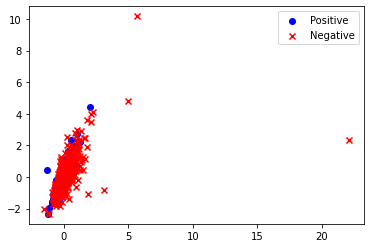

In [51]:
positive = X[new_y == 1]
negative = X[new_y == 0]
plt.scatter(positive[:, 0], positive[:, 1], c='blue', marker='o', label='Positive')
plt.scatter(negative[:, 0], negative[:, 1], c='red', marker='x', label='Negative')
plt.legend()
plt.show()

In [54]:
print(positive.shape, negative.shape)
print(X.shape)
print(positive[:,1].shape)

(143, 40) (611, 40)
(754, 40)
(143,)


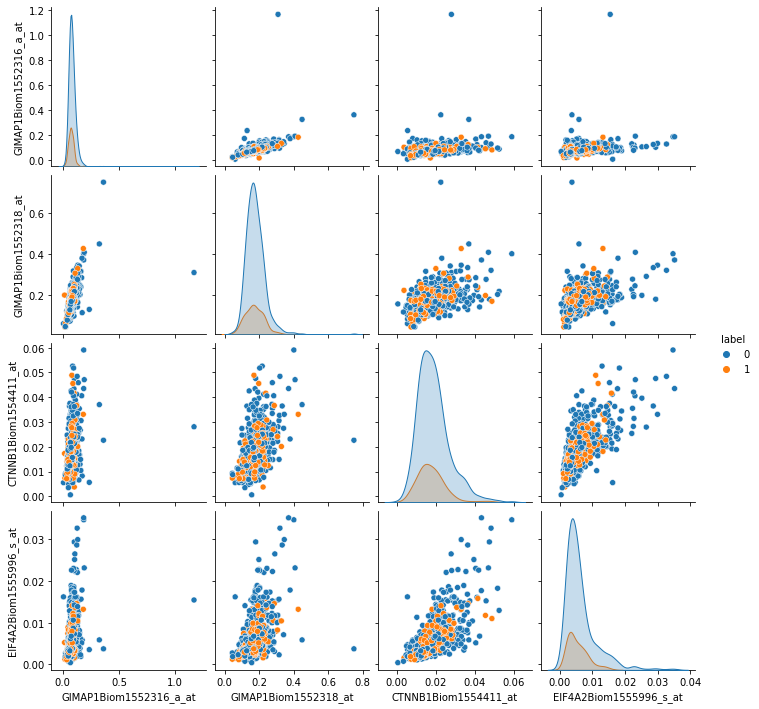

In [68]:
import seaborn as sns
data2 = data.loc[:, 'GIMAP1Biom1552316_a_at':'EIF4A2Biom1555996_s_at']
new_y = new_y.reshape(-1, 1)
data2['label'] = new_y
sns.pairplot(data2, hue='label')